# GFPGAN Inference Demo


[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2101.04061)
[![GitHub Stars](https://img.shields.io/github/stars/TencentARC/GFPGAN?style=social)](https://github.com/TencentARC/GFPGAN)
[![download](https://img.shields.io/github/downloads/TencentARC/GFPGAN/total.svg)](https://github.com/TencentARC/GFPGAN/releases)

## GFPGAN - Towards Real-World Blind Face Restoration with Generative Facial Prior

GFPGAN is a blind face restoration algorithm towards real-world face images. <br>
It leverages the generative face prior in a pre-trained GAN (*e.g.*, StyleGAN2) to restore realistic faces while precerving fidelity. <br>

You may want to try an **imporoved** model without colorization. (It also does not require CUDA extensions). Please go to this [Colab Demo](https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo) for GFPGAN <a href="https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>.

**Limitations**: GFPGAN could not handle all the low-quality faces in the real world. Therefore, it may fail on your own cases.

###Enjoy! :-)

<img src="https://xinntao.github.io/projects/GFPGAN_src/gfpgan_teaser.jpg" width="800">

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [ ]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# Set BASICSR_EXT=True to compile the cuda extensions in the BasicSR - It may take several minutes to compile, please be patient.
!BASICSR_EXT=True pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v0.1.0/GFPGANv1.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 378 (delta 118), reused 90 (delta 90), pack-reused 230
Receiving objects: 100% (378/378), 5.28 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (199/199), done.
/content/GFPGAN
     |████████████████████████████████| 161 kB 5.4 MB/s 
     |████████████████████████████████| 5.8 MB 31.1 MB/s 
     |████████████████████████████████| 190 kB 48.5 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.9-cp37-cp37m-linux_x86_64.whl size=8159598 sha256=ec2b429a7711987ea2973f0d1e37553945c9611ce17d34c79f9b497239017a97
  Stored in directory: /root/.cache/pip/wheels/92/52/70/341916b8c102f1e4416695e601d4aa71ba34d1080f7aa47cf5
Successfully built basicsr
     |████████████████████████████████| 56 kB 2.8 MB/s 
     |████████████████████████████████| 177 kB 9.6 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.

# Inference cropped face images

We first look at the cropped low-quality faces.<br>
Some examples are in the <inputs/cropped_faces> folder.

(-0.5, 511.5, 511.5, -0.5)

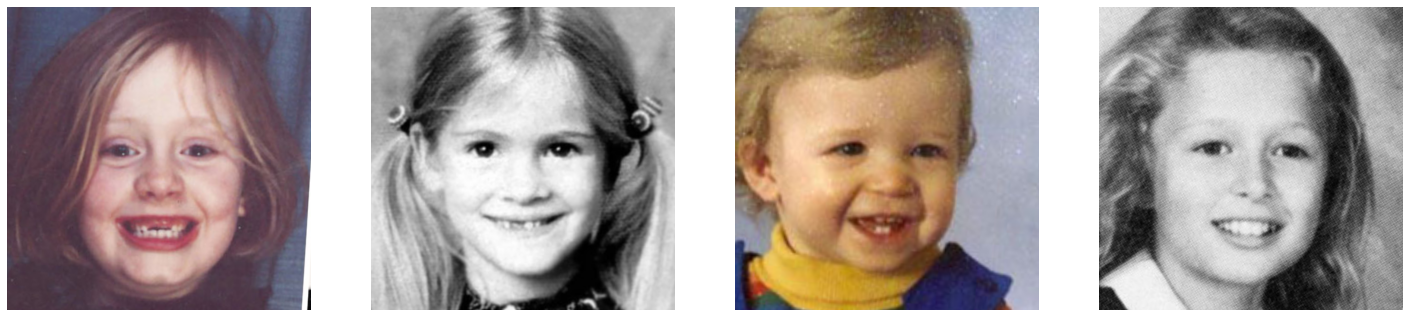

In [ ]:
# visulize the cropped low-quality faces
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('inputs/cropped_faces/Adele_crop.png')
img2 = imread('inputs/cropped_faces/Julia_Roberts_crop.png')
img3 = imread('inputs/cropped_faces/Justin_Timberlake_crop.png')
img4 = imread('inputs/cropped_faces/Paris_Hilton_crop.png')

# show images
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 4, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(1, 4, 2) 
ax2.imshow(img2)
ax2.axis('off')
ax3 = fig.add_subplot(1, 4, 3) 
ax3.imshow(img3)
ax3.axis('off')
ax4 = fig.add_subplot(1, 4, 4) 
ax4.imshow(img4)
ax4.axis('off')

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# The meanings of each argument:
# --model_path: the path to the pre-trained GFPGAN model
# --test_path: the folder path to the low-quality images
# --aligned: whether the input images are aligned
!python inference_gfpgan.py --model_path experiments/pretrained_models/GFPGANv1.pth --test_path inputs/cropped_faces --save_root results --arch original --channel 1

Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth" to /usr/local/lib/python3.7/dist-packages/realesrgan/weights/RealESRGAN_x2plus.pth

100% 64.0M/64.0M [00:00<00:00, 115MB/s]
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:01<00:00, 81.4MB/s] 
Processing Adele_crop.png ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Processing Julia_Roberts_crop.png ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Processing Justin_Timberlake_crop.png ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Processing Paris_Hilton_crop.png ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Results are in the [results] folder.


In [ ]:
# Now, let us to look at the reuslts! :-)
# The results are in the <resutls> folder
!ls results

cmp  cropped_faces  restored_faces  restored_imgs


(-0.5, 1023.5, 511.5, -0.5)

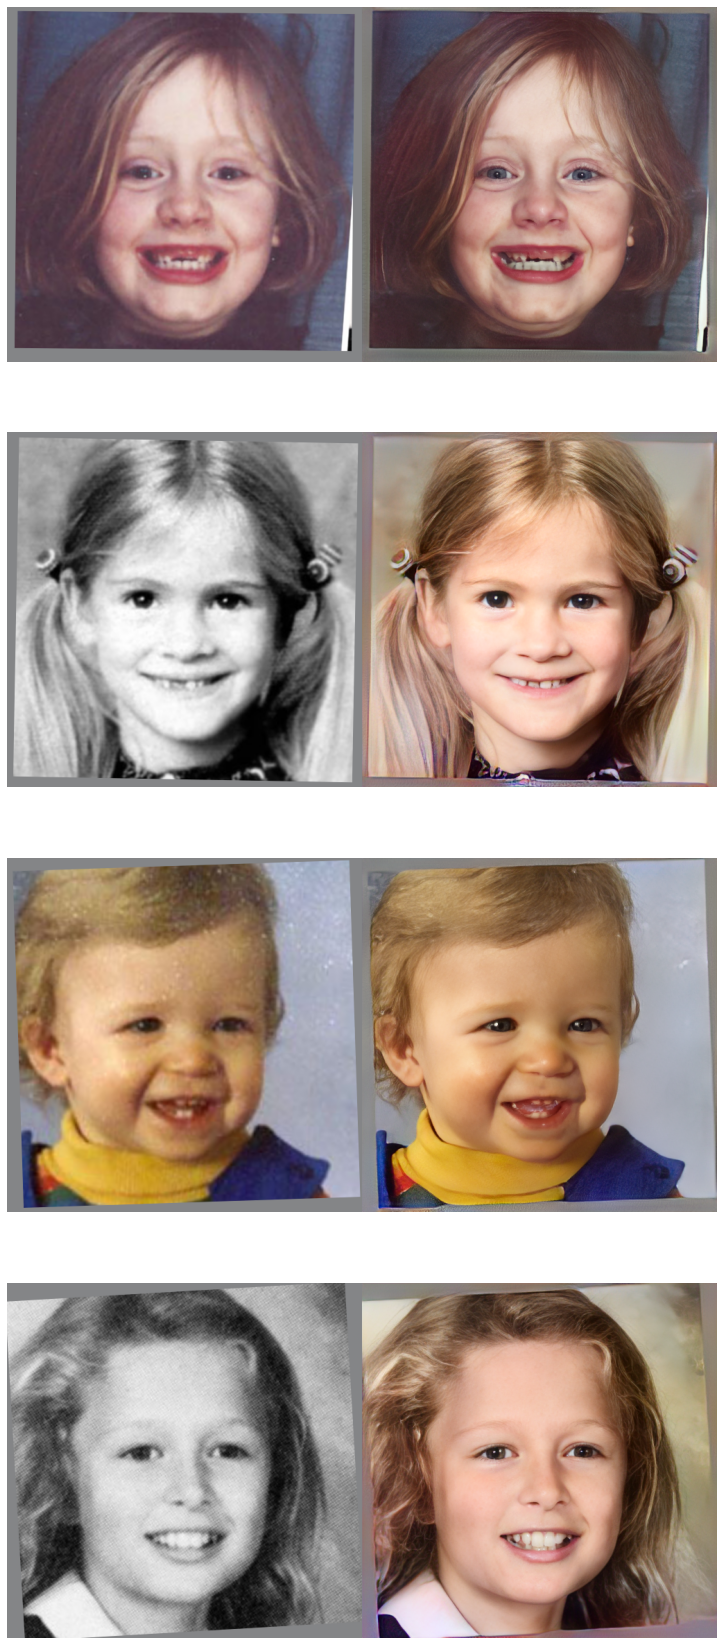

In [ ]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('results/cmp/Adele_crop_00.png')
img2 = imread('results/cmp/Julia_Roberts_crop_00.png')
img3 = imread('results/cmp/Justin_Timberlake_crop_00.png')
img4 = imread('results/cmp/Paris_Hilton_crop_00.png')

# show images
fig = plt.figure(figsize=(15, 30))
ax1 = fig.add_subplot(4, 1, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(4, 1, 2) 
ax2.imshow(img2)
ax2.axis('off')
ax3 = fig.add_subplot(4, 1, 3) 
ax3.imshow(img3)
ax3.axis('off')
ax4 = fig.add_subplot(4, 1, 4) 
ax4.imshow(img4)
ax4.axis('off')

We can see that:
Not only the **facial details**, but also the **colors** are enhanced by the GFPGAN model.

# Inference whole images

We use `facexlib` to detect and crop face images on a whole photo, and then restore the face images by GFPGAN.

Note that currently, it does not well support to paste the faces back into the original photo, as the restored faces are incosistent with the original photos in terms of details and colors.<br>
You can find the improved version in this [Colab Demo](https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo).

<br>

Now, we will enhance the faces in the following two photos.



(-0.5, 782.5, 1145.5, -0.5)

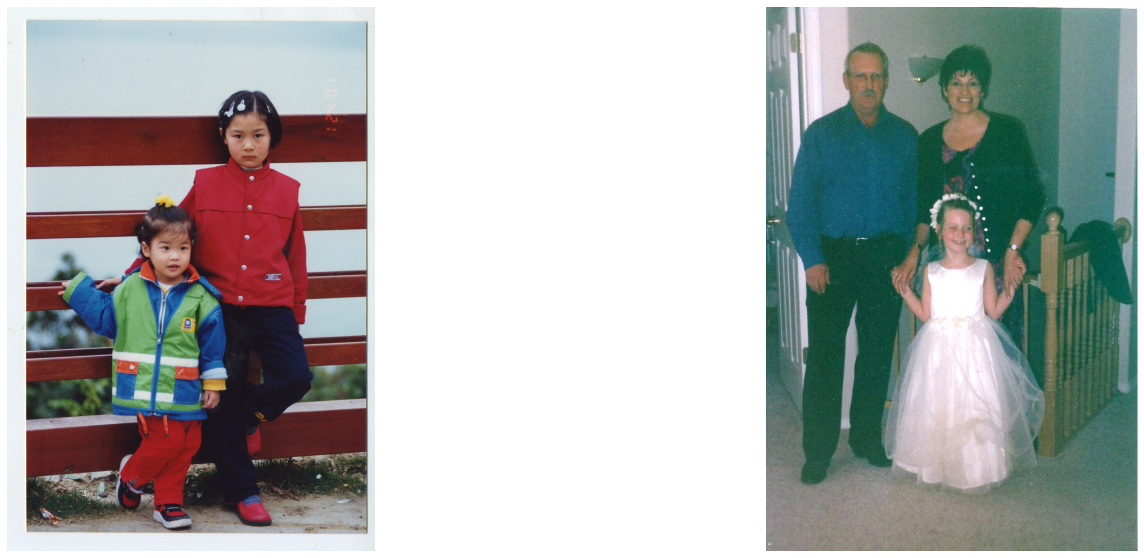

In [ ]:
# Visualize input images to be resotred
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('inputs/whole_imgs/00.jpg')
img2 = imread('inputs/whole_imgs/10045.png')

# show images
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2) 
ax2.imshow(img2)
ax2.axis('off')

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# The meanings of each argument:
# --model_path: the path to the pre-trained GFPGAN model
# --test_path: the folder path to the low-quality images
!rm -rf results
!python inference_gfpgan.py --model_path experiments/pretrained_models/GFPGANv1.pth --test_path inputs/whole_imgs --save_root results --arch original --channel 1

Processing 00.jpg ...
	Tile 1/20
	Tile 2/20
	Tile 3/20
	Tile 4/20
	Tile 5/20
	Tile 6/20
	Tile 7/20
	Tile 8/20
	Tile 9/20
	Tile 10/20
	Tile 11/20
	Tile 12/20
	Tile 13/20
	Tile 14/20
	Tile 15/20
	Tile 16/20
	Tile 17/20
	Tile 18/20
	Tile 19/20
	Tile 20/20
Processing 10045.png ...
	Tile 1/6
	Tile 2/6
	Tile 3/6
	Tile 4/6
	Tile 5/6
	Tile 6/6
Processing Blake_Lively.jpg ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Results are in the [results] folder.


(-0.5, 1023.5, 511.5, -0.5)

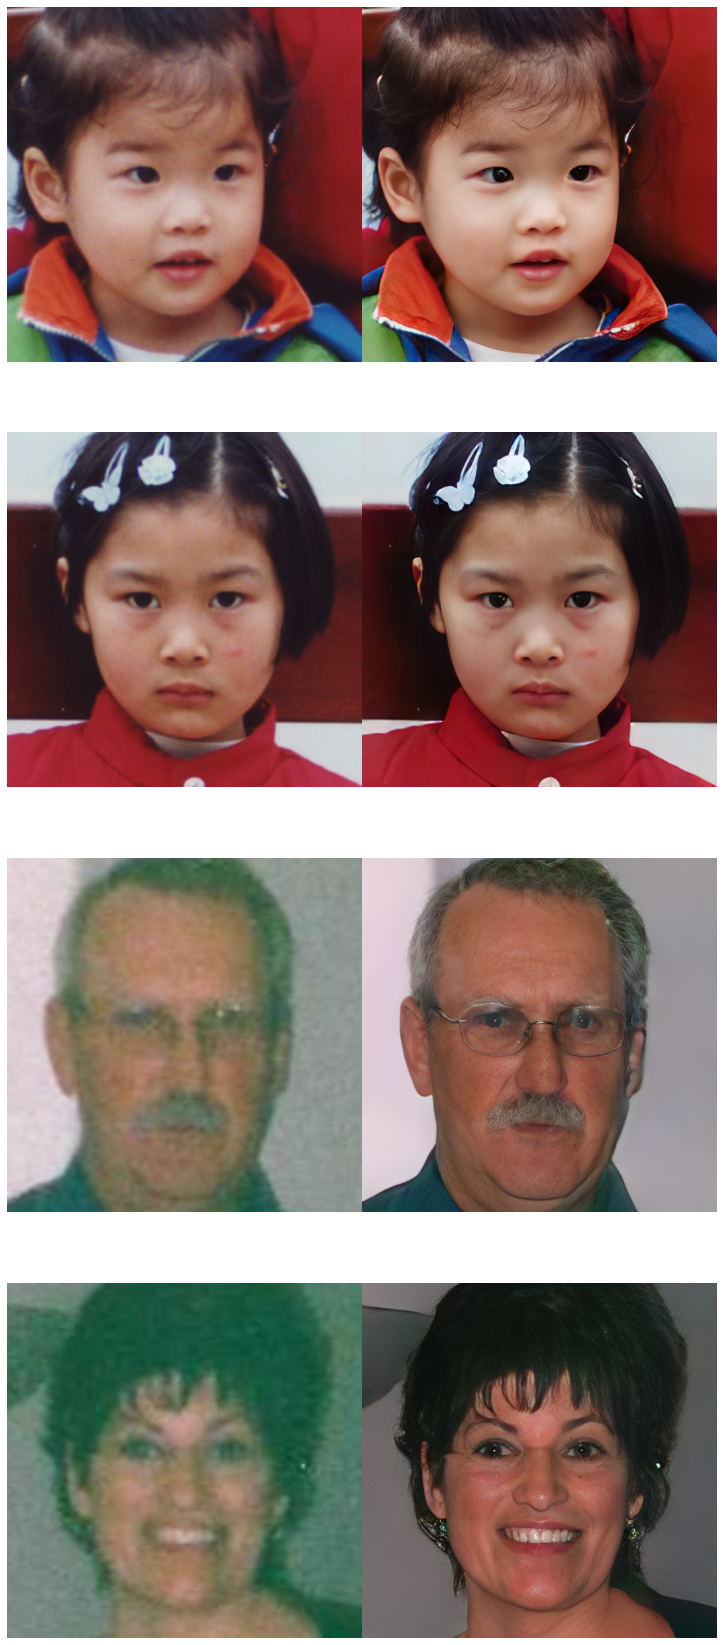

In [ ]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('results/cmp/00_00.png')
img2 = imread('results/cmp/00_01.png')
img3 = imread('results/cmp/10045_02.png')
img4 = imread('results/cmp/10045_01.png')

# show images
fig = plt.figure(figsize=(15, 30))
ax1 = fig.add_subplot(4, 1, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(4, 1, 2) 
ax2.imshow(img2)
ax2.axis('off')
ax3 = fig.add_subplot(4, 1, 3) 
ax3.imshow(img3)
ax3.axis('off')
ax4 = fig.add_subplot(4, 1, 4) 
ax4.imshow(img4)
ax4.axis('off')

(-0.5, 1565.5, 2291.5, -0.5)

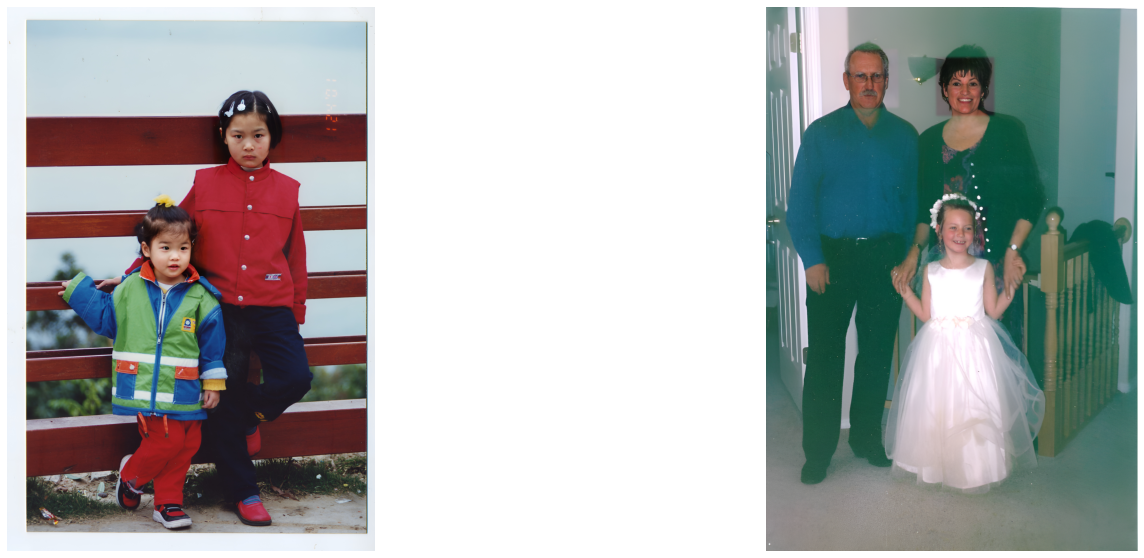

In [ ]:
# Visualize the whole images 
# However, due to the color and detail inconsistency, the results may look unnatural. 

import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('results/restored_imgs/00.jpg')
img2 = imread('results/restored_imgs/10045.png')

# show images
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2) 
ax2.imshow(img2)
ax2.axis('off')

You can see that:
1. the faces in the first photo are enhanced and the whole result looks natural;
2. However, as the face colors have been largely changed in the second photo, therefore, the whole result looks inconsistent.

BTW, we use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions.

# Try it on uploaded images

## 1. Upload images

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving WhatsApp Image 2022-01-02 at 6.07.58 PM.jpeg to WhatsApp Image 2022-01-02 at 6.07.58 PM.jpeg
move WhatsApp Image 2022-01-02 at 6.07.58 PM.jpeg to inputs/upload/WhatsApp Image 2022-01-02 at 6.07.58 PM.jpeg


## 2. Inference

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# The meanings of each argument:
# --model_path: the path to the pre-trained GFPGAN model
# --test_path: the folder path to the low-quality images
!rm -rf results
!python inference_gfpgan.py --model_path experiments/pretrained_models/GFPGANv1.pth --test_path inputs/upload --arch original --channel 1
!ls results/cmp

Processing WhatsApp Image 2022-01-02 at 6.07.58 PM.jpeg ...
	Tile 1/8
	Tile 2/8
	Tile 3/8
	Tile 4/8
	Tile 5/8
	Tile 6/8
	Tile 7/8
	Tile 8/8
Results are in the [results] folder.
'WhatsApp Image 2022-01-02 at 6.07.58 PM_00.png'


## 3. Visualize

(-0.5, 511.5, 511.5, -0.5)

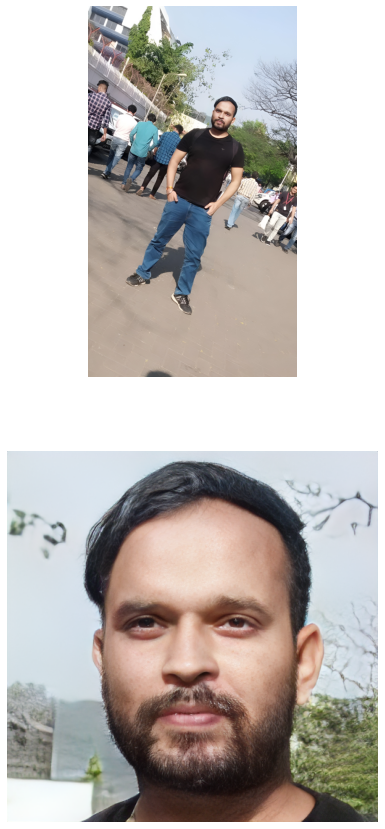

In [ ]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
# read images

img1 = imread('/content/GFPGAN/results/restored_imgs/WhatsApp Image 2022-01-02 at 6.07.58 PM.jpeg')
img2 = imread('/content/GFPGAN/results/restored_faces/WhatsApp Image 2022-01-02 at 6.07.58 PM_00.png')


# show images
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 1, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(2, 1, 2) 
ax2.imshow(img2)
ax2.axis('off')


## 4. Download results

In [ ]:
# download the result
!ls results
print('Download results')
os.system('zip -r download.zip results')
files.download("download.zip")

cmp  cropped_faces  restored_faces  restored_imgs
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You may want to try an **imporoved** model without colorization. (It also does not require CUDA extensions). Please go to this [Colab Demo](https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo) for GFPGAN <a href="https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>.